# Выявление закономерностей, определяющих успешность игр.

**Перед вами исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы до 2016 года. Необходимо исследовать данные и выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.**

 
Описание данных:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
- Данные за 2016 год могут быть неполными.

Список действий:
Для выявления закономерностей определяющих успешность игр необходимо 
провести с данными следующие действия:
- Подготовить данные
- Провести исследовательский анализ данных
- Составить портрет пользователя каждого региона
- Сформулировать и проверить гипотезы 
- Написать общий вывод

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
data['Name'].duplicated().sum()

data['Name'].value_counts()
data[data['Name'] == 'Need for Speed: Most Wanted']


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


In [7]:
data[['NA_sales',
'EU_sales',
'JP_sales',
'Other_sales',
'Critic_Score',
'User_Score']].describe()

,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,0.263377,0.145060,0.077617,0.047342,68.967679
std,0.813604,0.503339,0.308853,0.186731,13.938165
min,0.000000,0.000000,0.000000,0.000000,13.000000
25%,0.000000,0.000000,0.000000,0.000000,60.000000
50%,0.080000,0.020000,0.000000,0.010000,71.000000
75%,0.240000,0.110000,0.040000,0.030000,79.000000
max,41.360000,28.960000,10.220000,10.570000,98.000000


    Итог обзора данных: 
- Столбцы `Year_of_Release`,  `User_Score` , `Critic_Score` и `Rating` имеют пропуски
- Столбцы `Year_of_Release`,  `User_Score` и `Critic_Score` имеют неверные типы данных
- Столбец `Name` имеет явные дубликаты, однако, дубликаты имеют различные значения в других столбцах( игра на разных платформах, разные годы релиза и т. д.
- В столбцах с числовыми значениями, на первый взгляд, не наблюдаются выбросы и аномалии.


## Предобработка данных

### Перевожу в нижний регистр все наименования столбцов

In [8]:
#data.columns = [x.lower() for x in data.columns]
data.columns = map(str.lower, data.columns)
# Перевожу в нижний регистр все наименования столбцов
data.head()#Проверка

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Обработка пропусков и преобразование данных в нужный тип

Пропуски в столбцах  появиляются либо из за человеческого фактора(не указали год, жанр, платформу), либо во время заполнения таблицы небыло точных данных.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [10]:
data['year_of_release'] = data['year_of_release'].fillna(0)# для дальнейшего изменения типа данных

In [11]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,    0., 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [12]:
data = data[data['year_of_release'] > 0] # Избавляемся от "нулевого года" 


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [14]:
data['year_of_release'] = data['year_of_release'].astype(int) #Год - целочисленное значениеb

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [16]:
data['critic_score'] = data['critic_score'].fillna(-1)
#Заменяю пропуски оценки критиков на технически невозможное значение "-1" 

In [17]:
data['critic_score'].unique()

array([76., -1., 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [18]:
data['critic_score'].isna().sum()

0

In [19]:
data['critic_score'] = data['critic_score'].astype(int)
#Оценки критиков по условию не могут иметь дробные значения

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  int64  
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 1.5+ MB


In [21]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Значение `tbd` означает - "подлежит определению", что равносильно неопределенному или пустому значению. Превратим `tbd` в пустое значение, а затем обработаем вместе с другими пропусками

In [22]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

In [23]:
data['user_score'] = data['user_score'].fillna(-1)
#Заменяю пропуски оценки юзеров на технически невозможное значение "-1"

In [24]:
data['user_score'].unique()

array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [25]:
data['user_score'].isna().sum()

0

In [26]:
data['user_score'] = data['user_score'].astype(float) #Оценки пользователей - дробные значения (по условию)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  int64  
 9   user_score       16446 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [27]:
#В тех столбцах, в которых невозможно определить пропущенное значение, заменяю их на `unknown`(не определено)
data['name'] = data['name'].fillna('unknown')
data['genre'] = data['genre'].fillna('unknown')
data['rating'] = data['rating'].fillna('unknown')

In [28]:
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

### Cуммарные продажи во всех регионах

In [29]:
#data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data['sum_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [30]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,31.38


## Исследовательский анализ

### Кол-во релизов игр за разные годы

data.groupby('year_of_release')['year_of_release'].count() 


<AxesSubplot:>

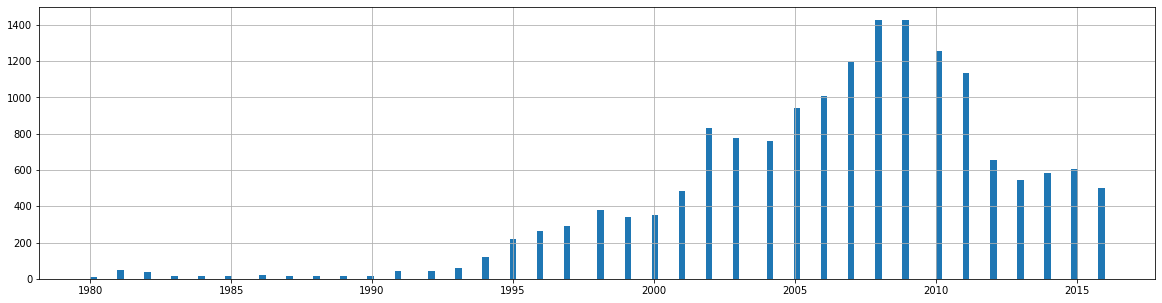

In [31]:
data['year_of_release'].hist(bins =150 ,figsize = (20,5))

Левую половину графика можно отсечь, так как разница между значениями очень большая, соответственно изучать весь период нет смысла.

### Продажи по платформам

In [32]:
top_platform = data.pivot_table(
    index= 'platform',
    values='sum_sales',
    aggfunc= 'sum'
).sort_values(by='sum_sales', ascending= False)

top6_platform = top_platform.head(6)
top6_platform

,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58


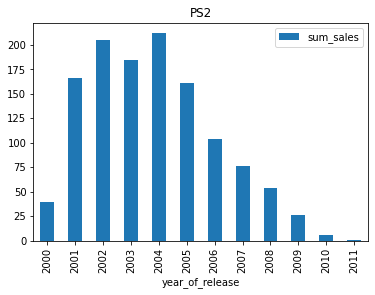

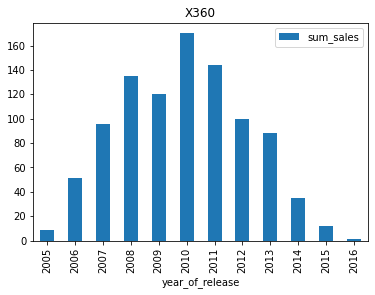

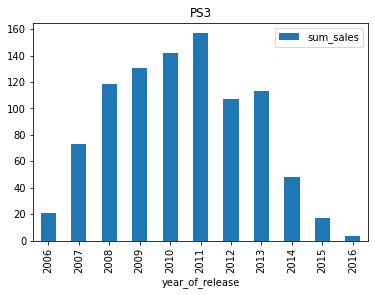

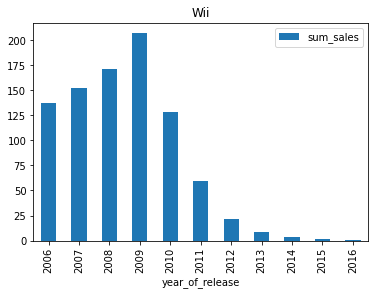

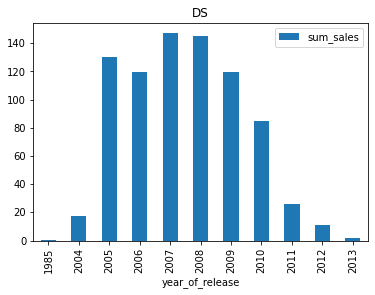

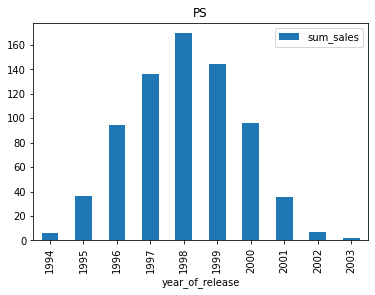

In [33]:
top_platforms = ('PS2' ,'X360','PS3', 'Wii', 'DS', 'PS')

for index in top_platforms:
    data[data['platform'] == index].pivot_table(
        index = 'year_of_release',
        values = 'sum_sales',
        aggfunc = 'sum').plot(kind='bar', title =index)
  

Жизнедеятельность платформы примерно равна 10 годам. На графике ниже, на примере платформ "PS", представленна плавная смена новыми платформами своих предшественниц. При снижении производства игр на старой платформе, повышается производство продукта на новой платформе. Таким образом за 20 лет сменилось 3 платформы. А кол-во релизов держалось на достаточно высоком уровне.

year_of_release
2006    AxesSubplot(0.125,0.125;0.775x0.755)
2007    AxesSubplot(0.125,0.125;0.775x0.755)
2008    AxesSubplot(0.125,0.125;0.775x0.755)
2009    AxesSubplot(0.125,0.125;0.775x0.755)
2010    AxesSubplot(0.125,0.125;0.775x0.755)
2011    AxesSubplot(0.125,0.125;0.775x0.755)
2012    AxesSubplot(0.125,0.125;0.775x0.755)
2013    AxesSubplot(0.125,0.125;0.775x0.755)
2014    AxesSubplot(0.125,0.125;0.775x0.755)
2015    AxesSubplot(0.125,0.125;0.775x0.755)
2016    AxesSubplot(0.125,0.125;0.775x0.755)
Name: year_of_release, dtype: object

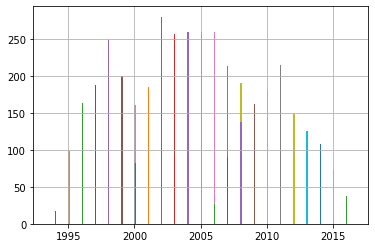

In [34]:
data.query('platform == "PS"').groupby('year_of_release')['year_of_release'].hist()
data.query('platform == "PS2"').groupby('year_of_release')['year_of_release'].hist()
data.query('platform == "PS3"').groupby('year_of_release')['year_of_release'].hist()

### Выбор актуального периода

 Ддя прогноза на 2017год предлагаю проводить анализ данных за 4 года. С 2013 по 2016 год. Так как некоторые платформы перестали получать доход до 2013г и анализ периода до 2013г не имеет смысла. Так- же данные за 2016 год могут быть неполными. В соответствии с поправками, выбераем период с 2013 по 2015 гг. как актуальный. 

In [71]:
actual_data = data.query(' 2016 >= year_of_release >= 2014') 
actual_data = actual_data.reset_index(drop=True)
actual_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1,-1.0,unknown,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1,-1.0,unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
1684,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
1685,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
1686,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
1687,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01


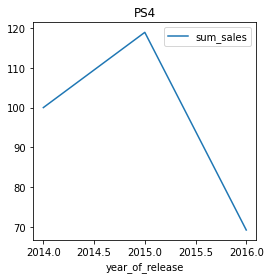

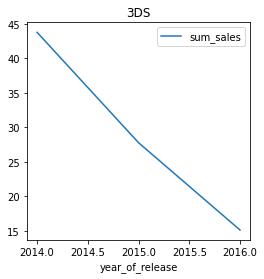

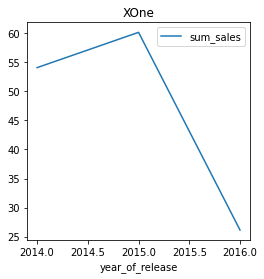

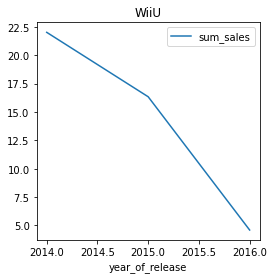

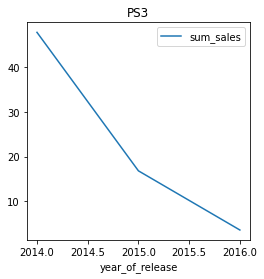

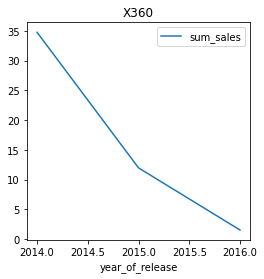

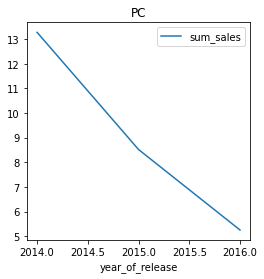

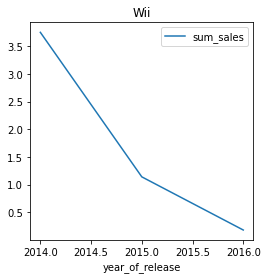

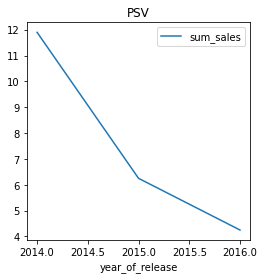

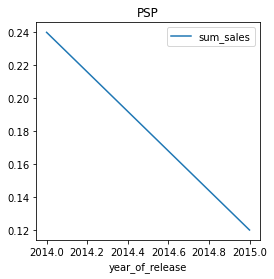

In [72]:
for row in actual_data['platform'].unique():
    actual_data[actual_data['platform']== row].pivot_table(
        index= 'year_of_release',
        values= 'sum_sales',
        aggfunc = 'sum').plot(
        title= row, figsize=(4, 4),style = '-')
        

In [73]:
actual_data = data.query(' 2016 >= year_of_release >= 2014') 
actual_data = actual_data.reset_index(drop=True)
actual_data
actual_data['year_of_release'].unique()

array([2015, 2014])

### Выявление лидеров продаж

In [74]:
top_actual_platform = actual_data.groupby('platform')['sum_sales'].sum().sort_values(ascending= False)
top_actual_platform

platform
PS4     218.90
XOne    114.21
3DS      71.54
PS3      64.58
X360     46.70
WiiU     38.38
PC       21.80
PSV      18.15
Wii       4.89
PSP       0.36
Name: sum_sales, dtype: float64


Лидеры продаж (топ-3): PS4;XOne; 3DS

    

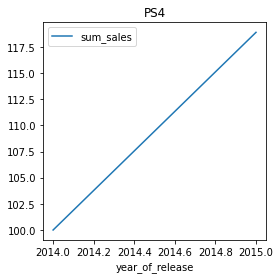

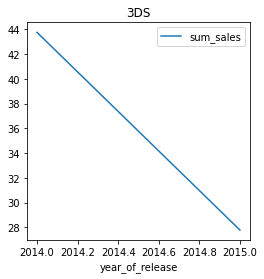

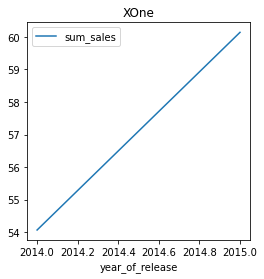

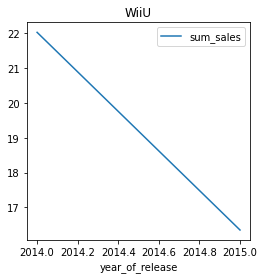

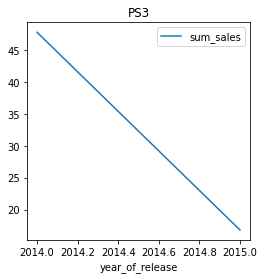

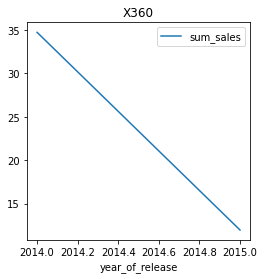

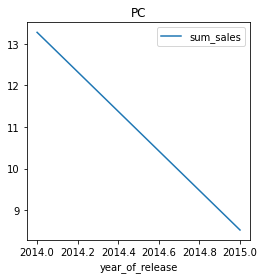

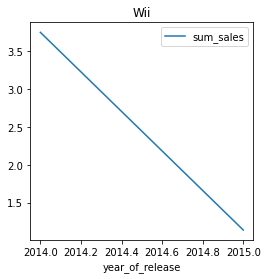

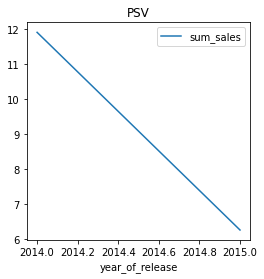

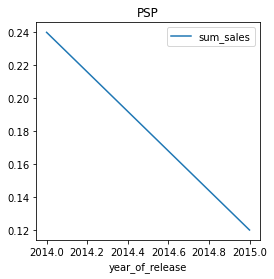

In [75]:
for row in actual_data['platform'].unique():
    actual_data[actual_data['platform']== row].pivot_table(
        index= 'year_of_release',
        values= 'sum_sales',
        aggfunc = 'sum').plot(
        title= row, figsize=(4, 4),style = '-')
        

Более наглядные графики для сравнения :

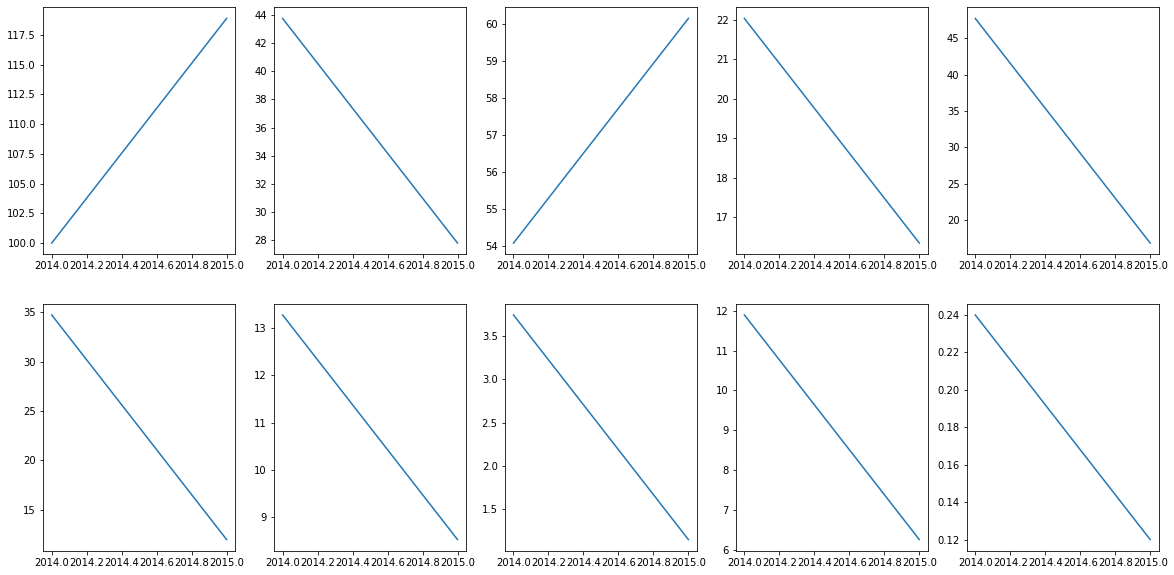

In [78]:
from itertools import cycle
 
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
subplots = cycle(ax.flat)
 
for row in actual_data['platform'].unique():
    subplot = next(subplots)
    grf = actual_data[actual_data['platform']== row].groupby('year_of_release')['sum_sales'].sum()
    subplot.plot(grf)
plt.show()    


    Продажи растут у PS4 и XOne
    Продажи падают у PS3, X360, Wii, DS, 3DS, PC, PSP, WiiU, PSV, PS2     
    Потенциально прибыльные платформы: PS4 и XOne

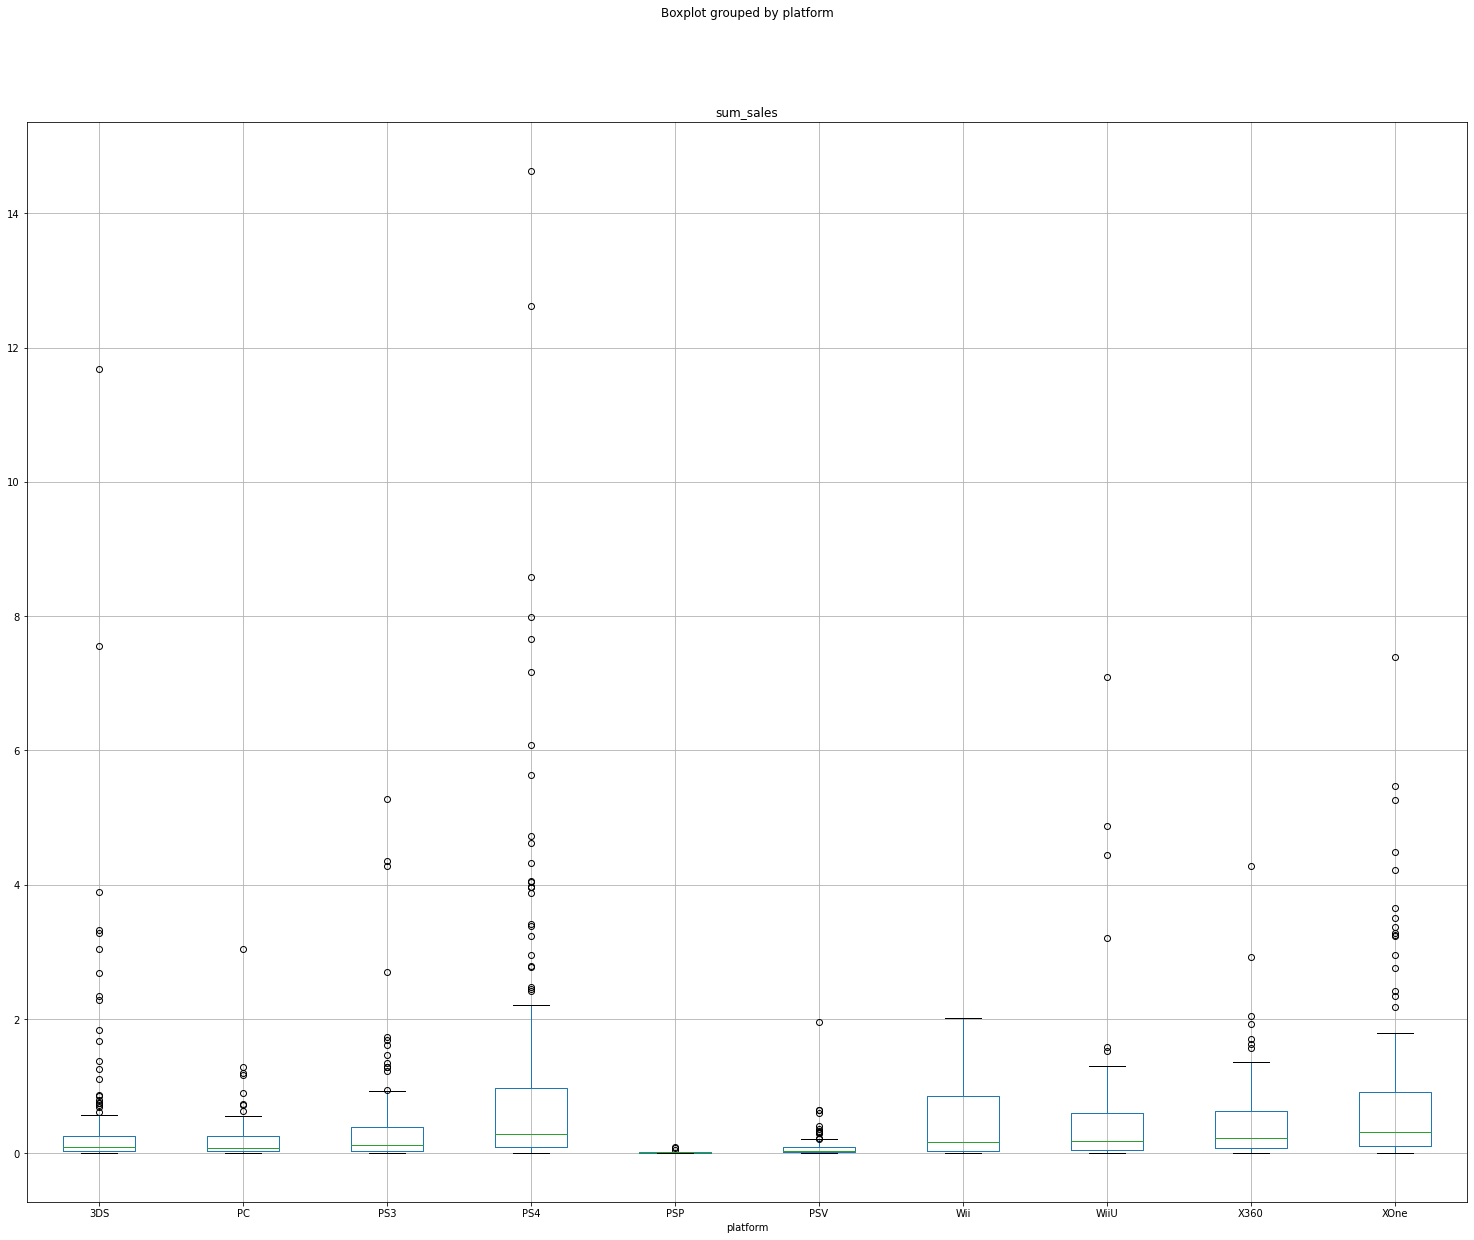

In [80]:
actual_data.boxplot(
    column='sum_sales',
    by='platform',
    figsize=(25,20)
)
plt.show()

Некоторые платформы имеют сумму продаж более 20млн копий, если принять эти значения как выброс , то можно сузить график и сделать его более наглядным. Сократим значения до 4 млн копий

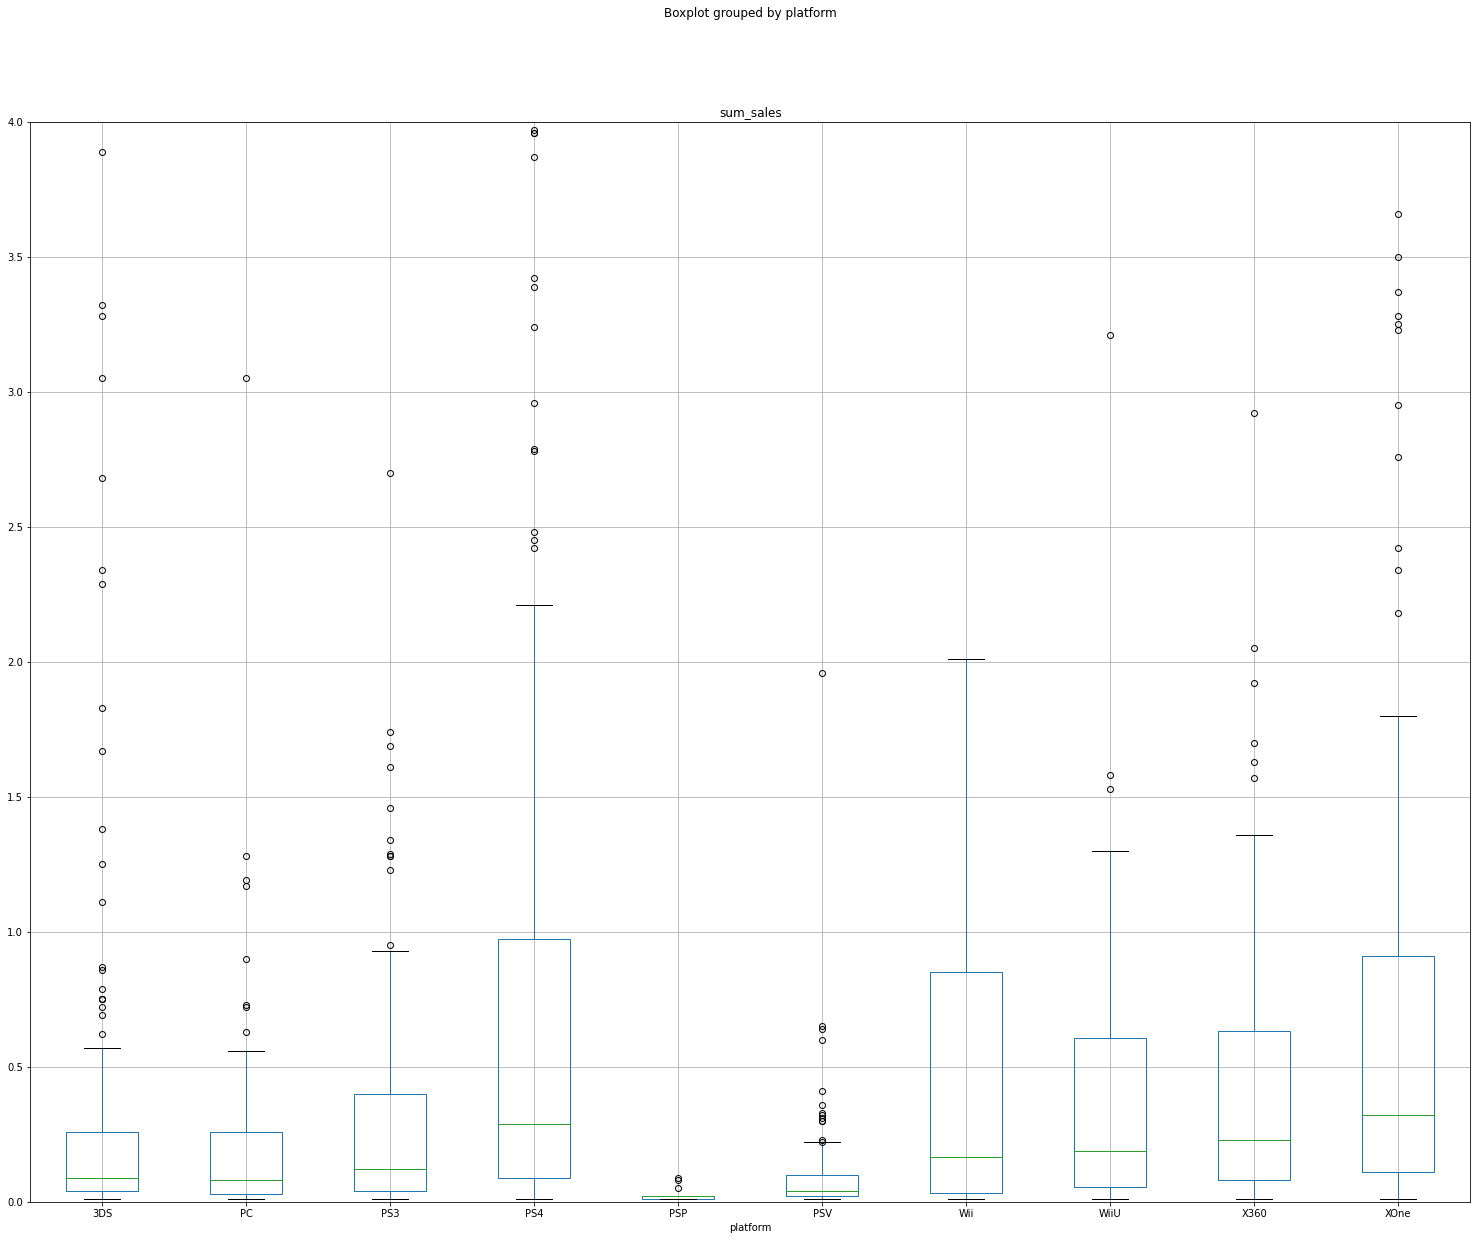

In [82]:
actual_data.boxplot(
    column='sum_sales',
    by='platform', 
    figsize=(25,20)
)
plt.ylim(0, 4)
plt.show()

PS4 и  XOne очень похожи между собой(практически идентичны). Границы и  медиана почти на одном уровне. Медиана у PS4 и  XOne выше чем у остальных, это значит что при стабильном рынке(без выбросов) у этих платформ продаж больше. 

### Влияние оценки прользователей и критиков на продажи

In [42]:
actual_data[actual_data['platform']=='PS4']['user_score'].corr(actual_data['sum_sales'])


0.10411505527257948

<AxesSubplot:xlabel='user_score', ylabel='sum_sales'>

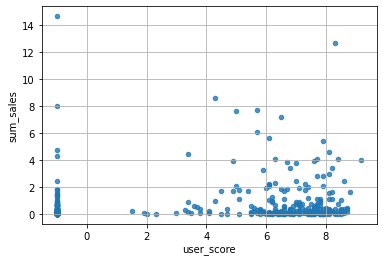

In [43]:
actual_data[actual_data['platform'] == 'PS4'].plot(
    x='user_score',
    y='sum_sales',
    kind='scatter',
    grid=True, 
    alpha=0.8
) 

In [44]:
actual_data[actual_data['platform']=='PS4']['critic_score'].corr(actual_data['sum_sales'])

0.2108468533672136

<AxesSubplot:xlabel='critic_score', ylabel='sum_sales'>

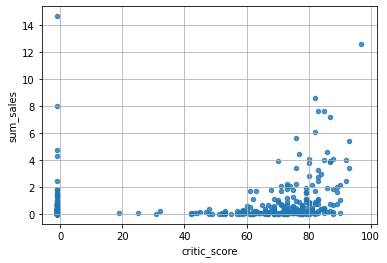

In [45]:
actual_data[actual_data['platform'] == 'PS4'].plot(
    x='critic_score',
    y='sum_sales',
    kind='scatter',
    grid=True, 
    alpha=0.8
) 

Вывод: Влияние отзывов на продажи крайне мало, однако критики в отличии от пользователей все таки влияют на продажи, но очень слабо.

Сравним с другими платформами:

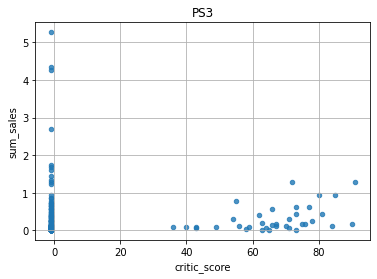

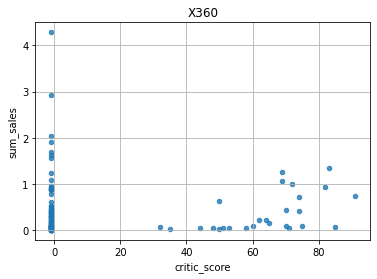

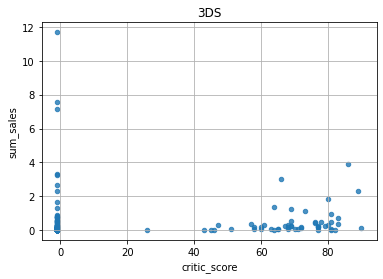

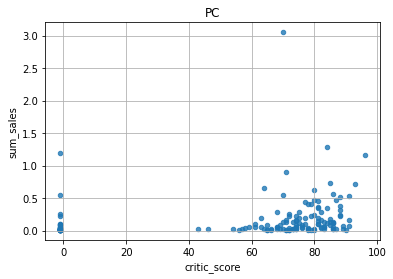

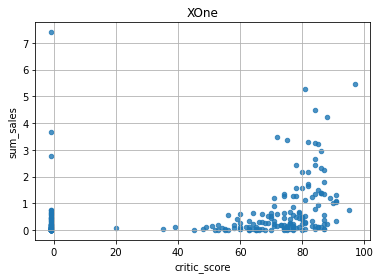

In [46]:
platforms = ('PS3', 'X360', '3DS', 'PC', 'XOne')
for row in platforms:
    actual_data[actual_data['platform'] == row].plot(
    x='critic_score',
    y='sum_sales',
    kind='scatter',
    grid=True,
    title = row,
    alpha=0.8
    )      


In [47]:
for row in platforms:
     print(row, ':',actual_data[actual_data['platform']==row]['critic_score'].corr(actual_data['sum_sales']))

PS3 : 0.023612142901272865
X360 : 0.0040124593668721415
3DS : 0.052992079088970565
PC : 0.1839232641167911
XOne : 0.27147591419241845


Положительная слабая корреляция, сильной зависимости от отзывов критиков не наблюдается!

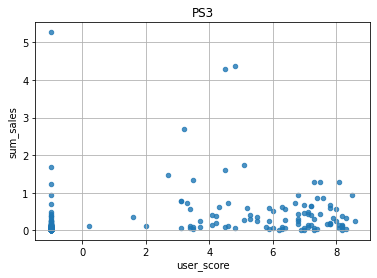

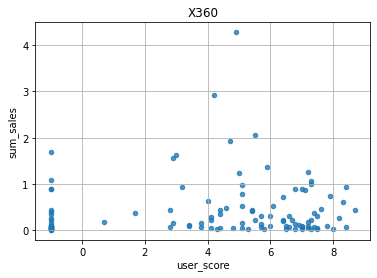

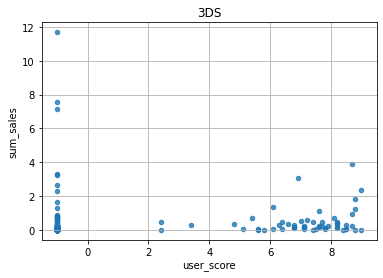

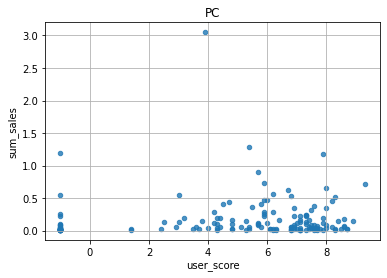

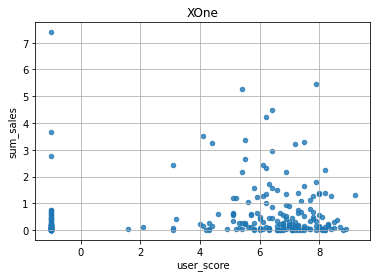

In [48]:
platforms = ('PS3', 'X360', '3DS', 'PC', 'XOne')
for row in platforms:
    actual_data[actual_data['platform'] == row].plot(
    x='user_score',
    y='sum_sales',
    kind='scatter',
    grid=True,
    title = row,
    alpha=0.8
    )      


In [49]:
for row in platforms:
     print(row, ':',actual_data[actual_data['platform']==row]['user_score'].corr(actual_data['sum_sales']))

PS3 : 0.20752813986735388
X360 : 0.08392212092173551
3DS : 0.05328739667893903
PC : 0.06901511514944639
XOne : 0.10671381981034207


Корреляция близка к нулю , продажи не зависят от оценок пользователей!

### Общее распределение игр по жанрам:

<AxesSubplot:xlabel='genre'>

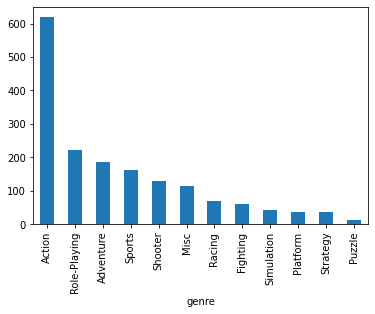

In [50]:
actual_data.groupby('genre')['genre'].count().sort_values(ascending= False).plot(kind= 'bar')

Распределение жанров по общим продажам:

<AxesSubplot:xlabel='genre'>

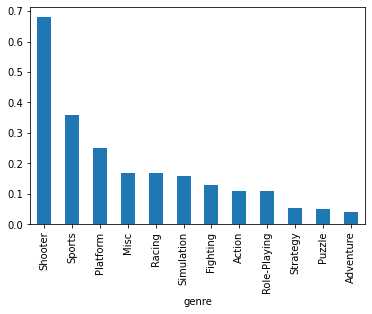

In [87]:
actual_data.groupby('genre')['sum_sales'].median().sort_values(ascending= False).plot(kind= 'bar')

Чаще всех выходит в свет жанр - "Экшн"! Но покупатели отдают предпочтение "стрелялкам"
Жанры "Пазл" , "Стратегия" и "Приключения"  не популярны.

## Портрет пользователя каждого региона

### Определяем для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5)


**ТОП-5 Северной Америки:**

In [88]:
top_platform_na = actual_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()
top_platform_na

platform
PS4     77.12
XOne    67.00
X360    27.61
PS3     21.38
3DS     18.50
Name: na_sales, dtype: float64

Доли в процентах от общих продаж:

In [89]:
percent_sales_na = top_platform_na / actual_data.groupby('platform')['sum_sales'].sum() * 100
percent_sales_na.sort_values(ascending=False).head() 


platform
X360    59.122056
XOne    58.663865
PS4     35.230699
PS3     33.106225
3DS     25.859659
dtype: float64

**ТОП-5 Европы:**

In [54]:
top_platform_eu = actual_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()
top_platform_eu

platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64

Доли в процентах от общих продаж:

In [55]:
percent_sales_eu = top_platform_eu / actual_data.groupby('platform')['sum_sales'].sum() * 100
percent_sales_eu.sort_values(ascending=False).head() 

platform
PC      66.432532
PS4     45.129273
PS3     37.459666
XOne    32.950983
3DS     18.597139
dtype: float64

**ТОП-5 Японии:**

In [56]:
top_platform_jp = actual_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()
top_platform_jp

platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64

Доли в процентах от общих продаж:

In [90]:
percent_sales_jp = top_platform_jp / actual_data.groupby('platform')['sum_sales'].sum() * 100
percent_sales_jp.sort_values(ascending=False).head() 

platform
PSV     80.110193
3DS     61.839530
WiiU    19.046378
PS3     17.373800
PS4      6.861581
dtype: float64

   - Японцы скупили 80% игр на платформе PSV, и 62% игр на 3DS
   - Больше половины копий на платформе XOne куплено в Северной Америке 
   - PS4 покупают везде. 1 место по продажам в Европе и Сев.Америке, 2ое место в Японии

Вывод: Японцы предпочитают игры в любом месте, так как PSV и 3DS это платформы на которых работают "карманные приставки" .  Северо-американцы и европейцы предпочитают играть у телевизора.

### Самые популярные жанры (топ-5) каждого региона (NA, EU, JP)

Топ 5 Северной Америки:

<AxesSubplot:xlabel='genre'>

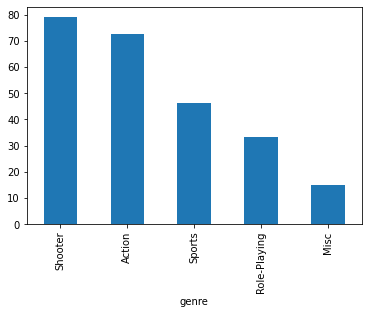

In [58]:
top_genre_na = actual_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()
top_genre_na.plot(kind ='bar')

Топ 5 Европы:

<AxesSubplot:xlabel='genre'>

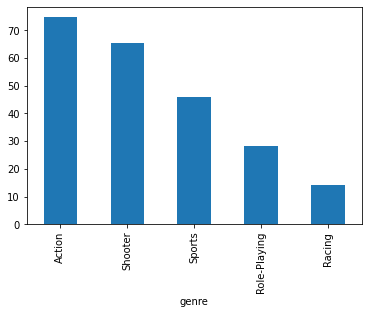

In [59]:
top_genre_eu = actual_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()
top_genre_eu.plot(kind ='bar')


Топ 5 Японии:


<AxesSubplot:xlabel='genre'>

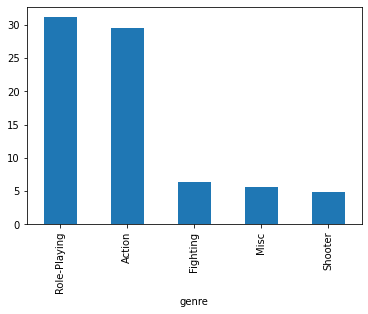

In [60]:
top_genre_jp = actual_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()
top_genre_jp.plot(kind ='bar')

В Северной Америке и Европе схожие вкусы ТОП жанров одинаковый! Самый продоваемый - это Экшен.
А в Японии Экшен на втором месте, а первую позицию занимает жанр "RPG". 

### Влияет ли рейтинг ESRB на продажи в отдельном регионе:

In [61]:
actual_data['rating'].unique()

array(['unknown', 'M', 'E', 'T', 'E10+'], dtype=object)

In [62]:
region_rating = actual_data.pivot_table(
    index= 'rating',
    values= ['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc= 'sum'
)
region_rating

,eu_sales,jp_sales,na_sales
rating,,,
E,58.06,8.94,50.74
E10+,26.16,4.46,33.23
M,93.44,8.01,96.42
T,34.07,14.78,38.95
unknown,58.95,56.90,64.72


<AxesSubplot:xlabel='rating'>

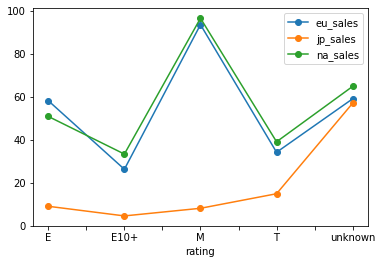

In [63]:
region_rating.plot(style='-o')

По данным сайта gamer.ru http://www.gamer.ru/everything/reytingi-esrb-ot-a-do-ya 
«M» («Mature») — «От 17 лет»: Материалы игры не подходят для возрастной категории младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории. Из последних игр это Saboteur, Left 4 Dead 2.

В Европе и Северной Америке предпочитают более жесткие проекты.
В Японии рейтинг не имеет такого сильного влияния на продажи. Если ,конечно, не учитывать неопределенный рейтинг.

## Проверьте гипотезы

### Проверка гипотезы " средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

Для проверки гипотезы нам потребуется специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: `scipy.stats.ttest_ind ()` .

нулевая и альтернативная гипотезы:

    H0: средние рейтинги по платформам равны (H0 всегда формулируется так, чтобы использовать знак равенства.)
    H1: средние рейтинги по платформам не равны (Н1 альтернативная гипотеза, которая противоречит нулевой гипотезе)

In [64]:
xbox_data = actual_data[actual_data['platform'] == 'XOne']
pc_data = actual_data[actual_data['platform'] == 'PC']

In [65]:
alpha = .05
results = st.ttest_ind(
xbox_data['user_score'],
pc_data['user_score'])
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2718222107871509
Не получилось отвергнуть нулевую гипотезу


_Вывод_: средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Гипотеза верна!

### Проверка гипотезы "средние пользовательские рейтинги жанров Action и Sports разные" 

По аналогии с прошлым заданием используем метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: `scipy.stats.ttest_ind ()` .

нулевая и альтернативная гипотезы:

    H0: средние рейтинги по жанрам равны (H0 всегда формулируется так, чтобы использовать знак равенства.)
    H1: средние рейтинги по жанрам не равны (Н1 альтернативная гипотеза, которая противоречит нулевой гипотезе)

In [66]:
action_data = actual_data[actual_data['genre'] == 'Action']
sports_data = actual_data[actual_data['genre'] == 'Sports']

In [67]:
alpha = .05
results = st.ttest_ind(
action_data['user_score'],
sports_data['user_score'])
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.00046659782032851705
Отвергаем нулевую гипотезу


_Вывод:_ средние пользовательские рейтинги жанров Action и Sports разные. Гипотеза верна!

# Общий вывод:

Из проведенного анализа выявленно несколько закономерностей определяющих успешность игр:
 - Самые популярные жанры игр "Action" и "Shooter". Однако, если большая часть продаж ориентированна на Японский рынок то следует сделать упор на жанр "RPG"
 - В Европе и Северной Америке предпочитают рейтинг игр для более взрослой публики (М). В Японии рейтинг не имеет такого сильного влияния на продажи
 - Самые популярные платформы в мире это: PS4; XOne. Также они являются потенциально прибыльными
 - Если продажи ориентированы на северо-американский или европейский рынки, то ставку нужно делать на PS4 и XOne. Для японского рынка лучше всего предложить игру для Nintendo 3DS или PlayStation Vita


Подводя итог, хочется предложить сделать ставку на "Action" и "Shooter"  с возрастным рейтингом 'M' на платформе PS4 либо XOne
И для Японцев отдельно -  РПГ на портативной платформе.